# Numerical integration

Numerical integration is a strategy to calculate the area under a curve numerically, without the need for the analytical solution of an integral. The can be very useful for complex and multidimensional problems, for example the area under a 3D LC-HRMS feature. In this case an analytical solution, implies that we first need to fully model the signal, then calculate the integral of the signal based on the model. Finally, we can use that integral to calculate the area under the peak. As you can imagine, this extremely difficult to achieve. Let's go through this together.

## E1: 

Let's generate a mass domain peak with amplitude (A) of 100, m/z value (*``\mu``*) of 150.05, and a mass precision (*``\sigma``*) of 0.02. 

$$ f(x,A,\mu,\sigma) =  \frac{A}{\sigma \sqrt{2 \pi}}\exp{\frac{-(x - \mu)^2}{2\sigma^{2}}}

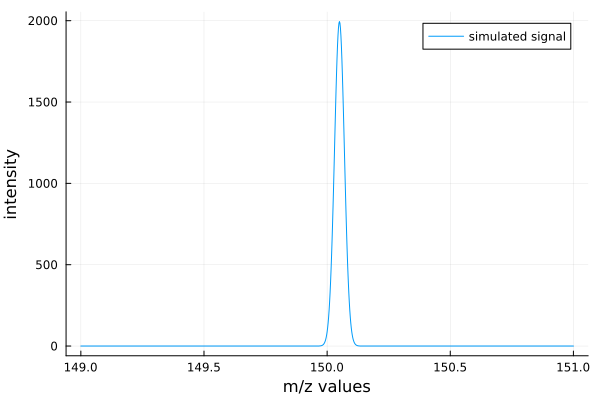

In [9]:
using DataSci4Chem

f(x,A,m,s) = (A/(s * sqrt(2 * pi))) * exp.(-(x .- m).^2 ./ (2*s^2))

x = collect(149:0.002:151)
A = 100
m = 150.05
s = 0.02

y = f(x,A,m,s)

plot(x,y,label = "simulated signal",xlabel = "m/z values", ylabel = "intensity")

## E2: 

Let's define the window where we want to integrate this peak. How can we do that?

> **Answer to E2:** 
>
> Here given that we are working with very clean simulated signal, we can choose values above a certain threshold for example 1.

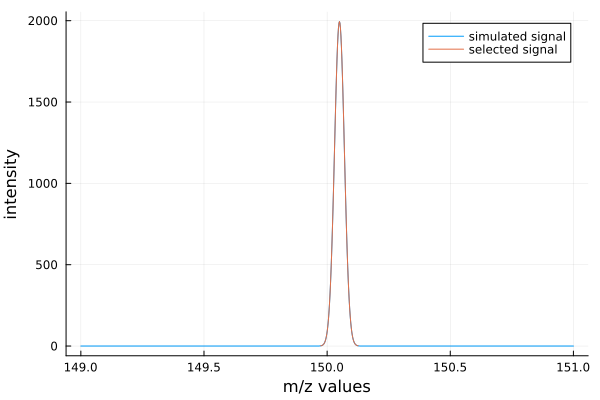

In [13]:

y2intg = y[y .>1] # 
x2intg = x[y .>1]

plot(x,y,label = "simulated signal",xlabel = "m/z values", ylabel = "intensity")
plot!(x2intg,y2intg,label = "selected signal")

## E3: 

What is the easiest way to estimate the area under this peak? 

> **Answer to E3:** 
>
> We can use a rectangle around this peak to perform the integration. 

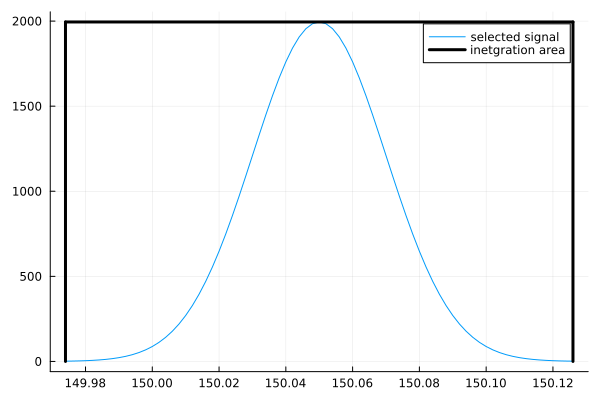

In [30]:
plot(x2intg,y2intg,label = "selected signal")
plot!([x2intg[1],x2intg[1]],[0,maximum(y2intg)],lc = :black, lw = 3, label =false)
plot!([x2intg[end],x2intg[end]],[0,maximum(y2intg)],lc = :black, lw = 3, label =false)
plot!([x2intg[1],x2intg[end]],[maximum(y2intg),maximum(y2intg)],lc = :black, lw = 3, label ="inetgration area")

## E4:

We have the rectangle. Now how do we do the integration? 

> **Answer to E4:**
>
> The area of a rectangle is calculated by multiplying the length (*l*) by the width (*w*). 
> $$ area_{rec} = l \times w = \frac{A}{\sigma \sqrt{2 \pi}} \times \Delta m/z $$

In [24]:
d_mz = x2intg[end] - x2intg[1]
inten = maximum(y2intg)

area_rec(l,w) = l .* w

area_rec(d_mz,inten)

303.19613310511926

## E5:

What if we only know the edges of the integration zone? Is there a way to find the *l* parameter automatically? 

> **Answer to E5:**
>
> Assuming symmetry we can find the *l* as the *f(x)*, where the *x* is the midpoint of the integration window. 

## E6: 

How do you find the midpoint? 

> **Answer to E6:**
>
> The midpoint can be calculated by averaging the edges of the integration area. 

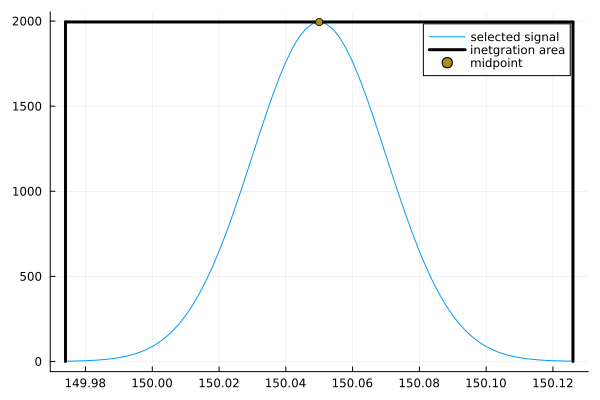

In [31]:
mdp = mean([x2intg[end],x2intg[1]])
y_mdp = f(mdp,A,m,s)
scatter!([mdp],[y_mdp],label = "midpoint")

## E7: 

Why cannot we use the maximum function for this?

> **Answer to E7:**
>
> For more complex systems the max may not work as it may be at the edge of the integration window. 

## E8: 

What is wrong with this estimation of the area?

> **Answer to E8:**
>
> As it can be seen, our method greatly overestimates the area under the peak. 

## E9:

How can we solve this problem?

> **Answer to E9:**
>
> We can increase the number of the rectangles used for the integration, for example two. 

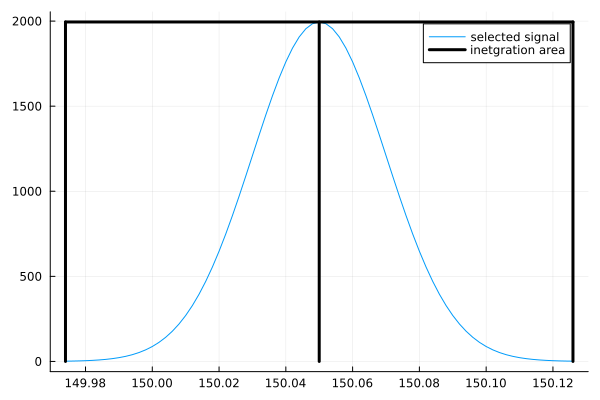

In [33]:
plot(x2intg,y2intg,label = "selected signal")
plot!([x2intg[1],x2intg[1]],[0,maximum(y2intg)],lc = :black, lw = 3, label =false)
plot!([x2intg[end],x2intg[end]],[0,maximum(y2intg)],lc = :black, lw = 3, label =false)
plot!([mdp,mdp],[0,maximum(y2intg)],lc = :black, lw = 3, label =false)
plot!([x2intg[1],x2intg[end]],[maximum(y2intg),maximum(y2intg)],lc = :black, lw = 3, label ="inetgration area")

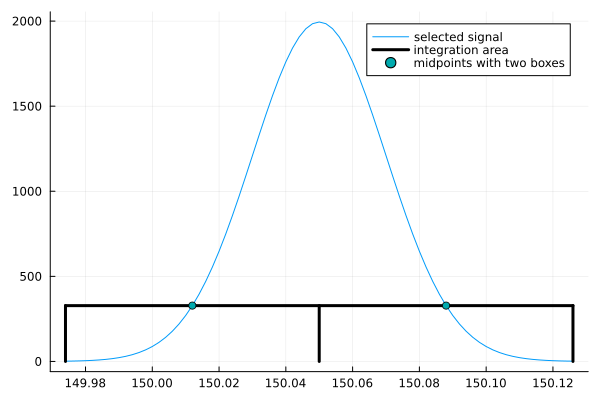

In [39]:
mdp2 = mean([x2intg[1],mdp])
mdp3 = mean([x2intg[end],mdp])

y2 = f(mdp2,A,m,s)
y3 = f(mdp3,A,m,s)

plot(x2intg,y2intg,label = "selected signal")
plot!([x2intg[1],x2intg[1]],[0,y2],lc = :black, lw = 3, label =false)
plot!([x2intg[end],x2intg[end]],[0,y2],lc = :black, lw = 3, label =false)
plot!([mdp,mdp],[0,y2],lc = :black, lw = 3, label =false)
plot!([x2intg[1],x2intg[end]],[y2,y3],lc = :black, lw = 3, label = "integration area")

scatter!([mdp2,mdp3],[y2,y3],label = "midpoints with two boxes")

## E

This is not that great!

In [16]:
100 / (0.02*sqrt(2 * 3.14))

1995.2172111690554

1000-element Vector{Float64}:
 500.0
 417.3553719008265
 416.8556311413455
 416.7533818938601
 416.7162403331354
 416.69870562604166
 416.6890620800854
 416.683197778218
 416.6793679825219
 416.6767298635416
   ⋮
 416.66666751493847
 416.66666751341955
 416.6666675114444
 416.66666750979584
 416.6666675081648
 416.66666750667093
 416.66666750480965
 416.6666675033468
 416.66666750141803

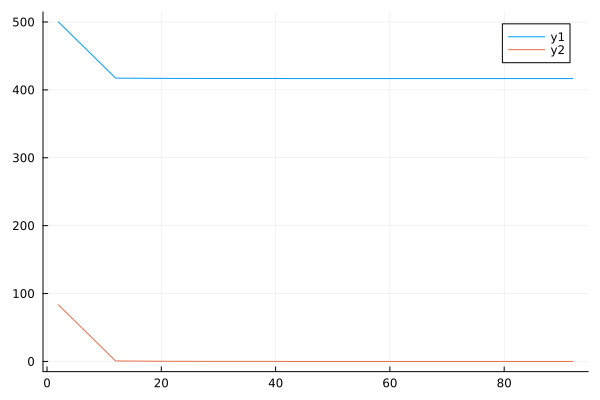

In [41]:
f1(x) = -(x.^3)/3 .+ (50 .* x) 

f1(5) - f1(-5)

416.6666666666667